**Based on : https://anomaly.io/seasonal-trend-decomposition-in-r/index.html**

In [1]:
from pmdarima.datasets import load_ausbeer
ausbeer = load_ausbeer()

## Step 1: Import the Data 

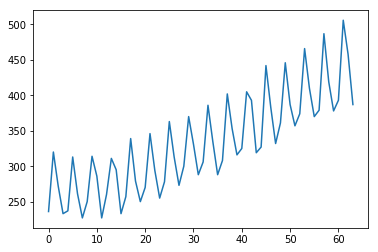

In [2]:
from matplotlib import pyplot as plt
head_index = 17*4+2
tail_index = 17*4-4
first_index = head_index - tail_index
last_index = head_index
timeserie_beer = ausbeer[first_index:last_index]
plt.plot(timeserie_beer)
plt.show()

## Step 2: Detect the Trend

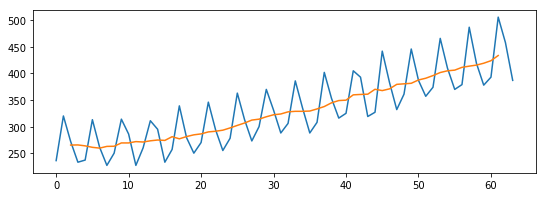

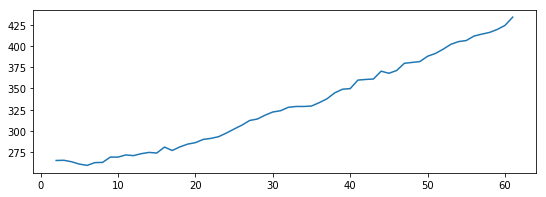

In [3]:
import numpy as np
N = 4
moving_average = np.convolve(timeserie_beer, np.ones((N,))/N, mode='valid')
moving_average_x, moving_average_y = range(N-2, len(moving_average) + 1), moving_average[:-N+3]
plt.figure(figsize=(9,3))
plt.plot(timeserie_beer)
plt.plot(moving_average_x, moving_average_y)
plt.show()
plt.figure(figsize=(9,3))
plt.plot(moving_average_x, moving_average_y)
plt.show()

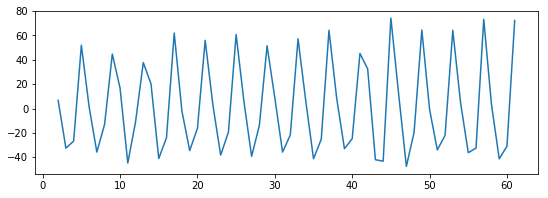

In [4]:
## Step 3: Detrend the Time Series
detrend_beer = timeserie_beer[moving_average_x] - moving_average_y
plt.figure(figsize=(9,3))
plt.plot(moving_average_x, detrend_beer)
plt.show()

## Step 4: Average the Seasonality

This is slightly off, but we can resolve this later.


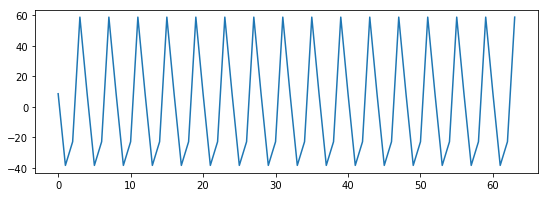

In [5]:
m_beer = np.reshape(detrend_beer, (15,4))
seasonal_beer = np.mean(m_beer, axis=0)

print("This is slightly off, but we can resolve this later.")

for i in range(4):
    seasonal_beer = np.concatenate((seasonal_beer, seasonal_beer))
plt.figure(figsize=(9,3))
plt.plot(seasonal_beer)
plt.show()

## Step 5: Examining Remaining Random Noise

- TODO: Finalize steps 5 and 6 and then mimic decompose.